In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load data from csv
df = pd.DataFrame.from_csv("HKQuantityTypeIdentifierDistanceWalkingRunning.csv")

creationDate     value
  2016-05-30  9.383601
  2017-04-23  8.287406
  2017-04-18  6.974976
  2016-07-30  6.947481
  2016-06-25  6.756653
  2016-06-03  6.501079
  2016-07-14  6.356404
  2017-02-19  6.316548
  2017-06-03  5.982887
  2017-05-11  5.788489
  2017-02-17  5.783325
  2016-05-14  5.713407
  2016-06-13  5.681886
  2016-07-23  5.640213
  2016-08-14  5.334043
  2016-07-25  5.238498
  2016-07-31  5.208264
  2016-06-16  5.092846
  2016-06-21  4.997401
  2016-07-19  4.897323


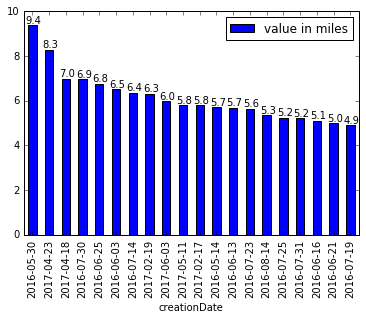

In [49]:
# get date from datetimestamp
df['creationDate'] = pd.to_datetime(df['creationDate']).dt.date

# group the data by date and sort the groupped data by highest value
grouppedByDay = df.groupby(['creationDate']).sum().reset_index().sort_values(['value'], ascending=[0]).head(20)

print(grouppedByDay.to_string(index=False))

# initialize matplotlib
%matplotlib inline

# plot the bar 
plt = grouppedByDay.plot(kind="bar", x="creationDate", y="value")

x_offset = -0.4
y_offset = 0.1

# annotate the bars with values
for p in plt.patches:
    b = p.get_bbox()
    val = "{:.1f}".format(b.y1 + b.y0)
    plt.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
    
# change legend text
legend = plt.legend()
legend.get_texts()[0].set_text('value in miles')

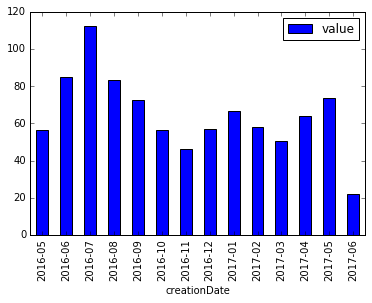

In [39]:
per = pd.to_datetime(df['creationDate']).dt.to_period("M")
grouppedByMonth = df.groupby(per).sum()
%matplotlib inline
grouppedByMonth.plot.bar()

In [40]:
print(grouppedByMonth.ix[grouppedByMonth['value'].idxmax()])

value    112.557964
Name: 2016-07, dtype: float64


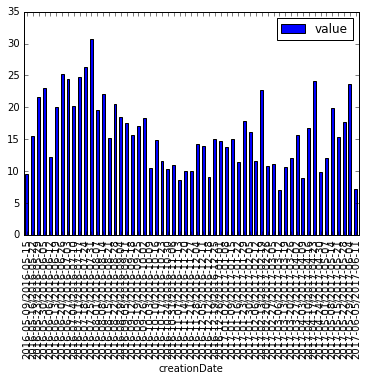

In [42]:
per = pd.to_datetime(df['creationDate']).dt.to_period("W")
grouppedByWeek = df.groupby(per).sum()
%matplotlib inline
grouppedByWeek.plot.bar()

In [43]:
print(grouppedByWeek.ix[grouppedByWeek['value'].idxmax()])

value    30.795041
Name: 2016-07-25/2016-07-31, dtype: float64
